# Cleaning and investigating the data

* Import the necessary libraries

In [103]:
import itertools
import numpy as np
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('ticks')

import pickle

from sklearn import metrics
from sklearn.metrics import mean_squared_error, roc_curve, roc_auc_score, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.formula.api import ols

from functions import *

* Import the data

In [104]:
df = pd.read_csv('data/online_news_popularity.csv')
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


* Check out column names

In [105]:
df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

* Remove spaces and shorten/clarify some column names

In [106]:
k = list(df.columns)
v = [column.strip() for column in df.columns]

In [107]:
renamer = dict(zip(k, v))
new_names = {'num_hrefs': 'num_links',
             'num_self_hrefs': 'num_self_links',
             'n_unique_tokens': 'rate_unique_tokens',
             'n_non_stop_words': 'rate_non_stop_words',
             'n_non_stop_unique_tokens': 'rate_non_stop_unique_tokens',
             'data_channel_is_lifestyle': 'lifestyle',
             'data_channel_is_entertainment': 'entertainment',
             'data_channel_is_bus': 'business',
             'data_channel_is_socmed': 'social_media',
             'data_channel_is_tech': 'tech',
             'data_channel_is_world': 'world',
             'self_reference_min_shares': 'self_ref_min_shares',
             'self_reference_max_shares': 'self_ref_max_shares',
             'self_reference_avg_sharess': 'self_ref_avg_shares',
             'weekday_is_monday': 'monday',
             'weekday_is_tuesday': 'tuesday',
             'weekday_is_wednesday': 'wednesday',
             'weekday_is_thursday': 'thursday',
             'weekday_is_friday': 'friday',
             'weekday_is_saturday': 'saturday',
             'weekday_is_sunday': 'sunday',
                }

In [108]:
df.rename(columns=renamer, inplace=True)
df.rename(columns=new_names, inplace=True)

In [109]:
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'rate_unique_tokens', 'rate_non_stop_words',
       'rate_non_stop_unique_tokens', 'num_links', 'num_self_links',
       'num_imgs', 'num_videos', 'average_token_length', 'num_keywords',
       'lifestyle', 'entertainment', 'business', 'social_media', 'tech',
       'world', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max',
       'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_ref_min_shares', 'self_ref_max_shares', 'self_ref_avg_shares',
       'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday',
       'sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polar

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   url                           39644 non-null  object 
 1   timedelta                     39644 non-null  float64
 2   n_tokens_title                39644 non-null  float64
 3   n_tokens_content              39644 non-null  float64
 4   rate_unique_tokens            39644 non-null  float64
 5   rate_non_stop_words           39644 non-null  float64
 6   rate_non_stop_unique_tokens   39644 non-null  float64
 7   num_links                     39644 non-null  float64
 8   num_self_links                39644 non-null  float64
 9   num_imgs                      39644 non-null  float64
 10  num_videos                    39644 non-null  float64
 11  average_token_length          39644 non-null  float64
 12  num_keywords                  39644 non-null  float64
 13  l

In [111]:
to_int = ['num_links', 'num_self_links', 'num_imgs', 'num_videos', 'num_keywords', 'lifestyle', 'entertainment',
          'business', 'social_media', 'tech', 'world', 'self_ref_min_shares', 'self_ref_max_shares', 
          'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday', 'is_weekend',
          ]
df[to_int] = df[to_int].astype('int64')

* Take a look at the target variable.

In [112]:
df.shares.describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12883bcc0>]],
      dtype=object)

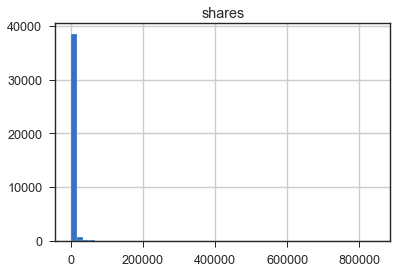

In [113]:
df.hist('shares',bins=50)

* See if the log of 'shares' normalizes it.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12bb026d8>]],
      dtype=object)

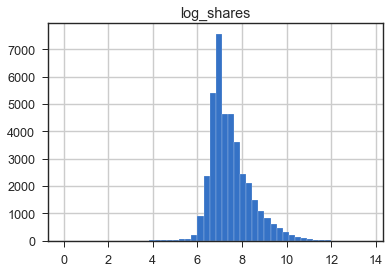

In [114]:
df['log_shares'] = df.shares.apply(lambda x: np.log(x))
df.hist('log_shares', bins=50)

* Data seems pretty clean, so we'll take a preliminary look at some numbers.

In [115]:
untouched_features = list(df.columns)
untouched_features.remove('shares')
untouched_features.remove('log_shares')
untouched_features.remove('url')
untouched_features.remove('monday')
untouched_features.remove('lifestyle')
untouched_features.remove('LDA_00')
# untouched_features.remove('timedelta')

col_list = '+'.join(untouched_features)
f = 'log_shares~' + col_list
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_shares   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     104.4
Date:                Wed, 06 May 2020   Prob (F-statistic):               0.00
Time:                        11:25:12   Log-Likelihood:                -50711.
No. Observations:               39644   AIC:                         1.015e+05
Df Residuals:                   39588   BIC:                         1.020e+05
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        6.7672      0.068     99.461      0.000       6.634       6.901
timedelta                     6.713e-05   2.97e-05      2.264      0.024    9.01e-06       0.000
n_tokens_title                   0.0083      0.002      3.777      0.000       0.004       0.013
n_tokens_content              4.052e-05   1.69e-05      2.396      0.017    7.37e-06    7.37e-05
rate_unique_tokens               0.2043      0.145      1.412      0.158      -0.079       0.488
rate_non_stop_words              0.0378      0.049      0.768      0.442      -0.059       0.134
rate_non_stop_unique_tokens     -0.2785      0.122     -2.274      0.023      -0.518      -0.039
num_links                        0.0042      0.001      8.247      0.000       0.003       0.005
num_self_links                  -0.0077      0.001     -5.724      0.000      -0.010      -0.005
num_imgs                         0.0025      0.001      3.626      0.000       0.001       0.004
num_videos                       0.0019      0.001      1.606      0.108      -0.000       0.004
average_token_length            -0.0910      0.018     -5.043      0.000      -0.126      -0.056
num_keywords                     0.0121      0.003      4.313      0.000       0.007       0.018
entertainment                   -0.1559      0.018     -8.607      0.000      -0.191      -0.120
business                        -0.1117      0.024     -4.596      0.000      -0.159      -0.064
social_media                     0.2098      0.024      8.630      0.000       0.162       0.257
tech                             0.1695      0.020      8.355      0.000       0.130       0.209
world                            0.0132      0.024      0.544      0.586      -0.034       0.061
kw_min_min                       0.0009      0.000      7.262      0.000       0.001       0.001
kw_max_min                    1.713e-05   3.81e-06      4.496      0.000    9.66e-06    2.46e-05
kw_avg_min                      -0.0001   2.34e-05     -5.465      0.000      -0.000   -8.21e-05
kw_min_max                   -3.726e-07   8.89e-08     -4.189      0.000   -5.47e-07   -1.98e-07
kw_max_max                    4.518e-08   4.46e-08      1.013      0.311   -4.23e-08    1.33e-07
kw_avg_max                   -2.577e-07   6.36e-08     -4.051      0.000   -3.82e-07   -1.33e-07
kw_min_avg                   -5.083e-05   5.72e-06     -8.879      0.000    -6.2e-05   -3.96e-05
kw_max_avg                   -4.212e-05   1.91e-06    -22.007      0.000   -4.59e-05   -3.84e-05
kw_avg_avg                       0.0003   1.09e-05     30.915      0.000       0.000       0.000
self_ref_min_shares           7.359e-07   5.69e-07      1.292      0.196    -3.8e-07    1.85e-06
self_ref_max_shares          -8.753e-09   3.09e-07     -0.028      0.977   -

* R<sup>2</sup> value is very low, so let's see if we can bring it up a bit.
* A closer looks at some of the columns shows some suspicious values of 0 and 1 for the rate of certain tokens and token types. Also some values are below 1 for columns that measure in article shares, even though the minimum value for shares is 1.
    * Reassign those 0s and 1s to each column's median value.
    * Reassign any less-than 1s in columns measuring in shares to 1.

In [116]:
df.kw_min_min.describe()

count    39644.000000
mean        26.106801
std         69.633215
min         -1.000000
25%         -1.000000
50%         -1.000000
75%          4.000000
max        377.000000
Name: kw_min_min, dtype: float64

In [117]:
less_set_to_one_cols = ['kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_avg_max',
                        'kw_min_avg', 'kw_max_avg', 'kw_avg_avg']

great_set_to_one_cols = ['rate_unique_tokens', 'rate_non_stop_unique_tokens']

zero_to_median_cols = ['average_token_length', 'n_tokens_content', 'rate_unique_tokens', 'global_subjectivity',
                       'global_rate_positive_words', 'rate_positive_words', 'rate_negative_words', 
                       'avg_positive_polarity', 'avg_negative_polarity']

one_to_median_cols = ['rate_non_stop_unique_tokens', 'rate_positive_words', 'rate_negative_words', 
                      'avg_positive_polarity']

In [120]:
for column in less_set_to_one_cols:
    less_set_to_one(df, column)
    
for column in great_set_to_one_cols:
    great_set_to_one(df, column)
    
for column in zero_to_median_cols:
    zero_to_median(df, column)
    
for column in one_to_median_cols:
    one_to_median(df, column)
    
neg_one_to_median(df, 'avg_negative_polarity')

In [121]:
cleaner_features = list(df.columns)
cleaner_features.remove('shares')
cleaner_features.remove('log_shares')
cleaner_features.remove('url')
cleaner_features.remove('monday')
cleaner_features.remove('lifestyle')
cleaner_features.remove('LDA_00')
# untouched_features.remove('timedelta')

col_list = '+'.join(cleaner_features)
f = 'log_shares~' + col_list
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_shares   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     106.5
Date:                Wed, 06 May 2020   Prob (F-statistic):               0.00
Time:                        11:29:41   Log-Likelihood:                -50708.
No. Observations:               39644   AIC:                         1.015e+05
Df Residuals:                   39589   BIC:                         1.020e+05
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        3.1907      3.107      1.027      0.304      -2.899       9.280
timedelta                     7.003e-05   2.96e-05      2.368      0.018    1.21e-05       0.000
n_tokens_title                   0.0085      0.002      3.869      0.000       0.004       0.013
n_tokens_content               3.36e-05   1.63e-05      2.055      0.040    1.56e-06    6.56e-05
rate_unique_tokens               0.0971      0.108      0.897      0.370      -0.115       0.309
rate_non_stop_words              0.0012      0.001      1.378      0.168      -0.000       0.003
rate_non_stop_unique_tokens     -0.1198      0.068     -1.766      0.077      -0.253       0.013
num_links                        0.0043      0.001      8.515      0.000       0.003       0.005
num_self_links                  -0.0076      0.001     -5.677      0.000      -0.010      -0.005
num_imgs                         0.0028      0.001      4.376      0.000       0.002       0.004
num_videos                       0.0021      0.001      1.796      0.073      -0.000       0.004
average_token_length            -0.0846      0.018     -4.746      0.000      -0.120      -0.050
num_keywords                     0.0121      0.003      4.294      0.000       0.007       0.018
entertainment                   -0.1564      0.018     -8.634      0.000      -0.192      -0.121
business                        -0.1124      0.024     -4.624      0.000      -0.160      -0.065
social_media                     0.2106      0.024      8.670      0.000       0.163       0.258
tech                             0.1685      0.020      8.307      0.000       0.129       0.208
world                            0.0130      0.024      0.533      0.594      -0.035       0.061
kw_min_min                       0.0009      0.000      7.200      0.000       0.001       0.001
kw_max_min                    1.709e-05   3.81e-06      4.485      0.000    9.62e-06    2.46e-05
kw_avg_min                      -0.0001   2.34e-05     -5.464      0.000      -0.000   -8.21e-05
kw_min_max                   -3.755e-07   8.89e-08     -4.222      0.000    -5.5e-07   -2.01e-07
kw_max_max                    4.348e-08   4.46e-08      0.975      0.330   -4.39e-08    1.31e-07
kw_avg_max                   -2.585e-07   6.36e-08     -4.064      0.000   -3.83e-07   -1.34e-07
kw_min_avg                   -5.037e-05   5.72e-06     -8.799      0.000   -6.16e-05   -3.92e-05
kw_max_avg                   -4.206e-05   1.91e-06    -21.981      0.000   -4.58e-05   -3.83e-05
kw_avg_avg                       0.0003   1.09e-05     30.887      0.000       0.000       0.000
self_ref_min_shares            7.16e-07   5.69e-07      1.257      0.209      -4e-07    1.83e-06
self_ref_max_shares          -2.523e-08   3.09e-07     -0.082      0.935   -

* A slightly higher F-statistic and adjusted R<sup>2</sup>, but no movement on the actual R<sup>2</sup>.
* Let's try categorizing the image and video columns, since the number itself doesn't seem to hold much value.

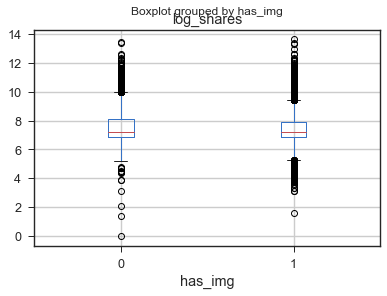

In [122]:
df['has_img'] = np.where(df.num_imgs > 0, 1, 0)
df.boxplot('log_shares', 'has_img')

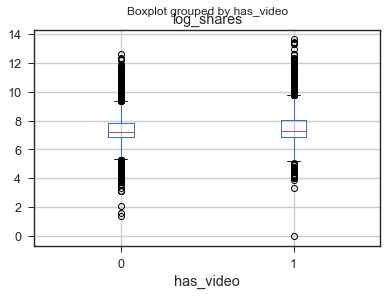

In [123]:
df['has_video'] = np.where(df.num_videos > 0, 1, 0)
df.boxplot('log_shares', 'has_video')

* Drop unnecessary data, suspicious data, and at least one dummy variable from each category.
    * 'rate_non_stop_words' (the rate of non-stop words in the content) only has values of 0 and 1, though values should seemingly be spread out between 0 and 1.

In [130]:
features = df.drop(columns=['url', 'timedelta', 'shares', 'num_imgs', 'num_videos',
                            'rate_non_stop_words', 'kw_max_max', 'kw_min_min', 'self_ref_min_shares',
                            'self_ref_max_shares',
                            'monday', 'lifestyle',  ])

In [131]:
features.columns

Index(['n_tokens_title', 'n_tokens_content', 'rate_unique_tokens',
       'rate_non_stop_unique_tokens', 'num_links', 'num_self_links',
       'average_token_length', 'num_keywords', 'entertainment', 'business',
       'social_media', 'tech', 'world', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_ref_avg_shares', 'tuesday', 'wednesday', 'thursday', 'friday',
       'saturday', 'sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02',
       'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'l

In [132]:
f_list = list(features.columns)
f_list.remove('log_shares')

col_list = '+'.join(f_list)
f = 'log_shares~' + col_list
model = ols(formula=f, data=features).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_shares   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     117.2
Date:                Wed, 06 May 2020   Prob (F-statistic):               0.00
Time:                        11:45:18   Log-Likelihood:                -50710.
No. Observations:               39644   AIC:                         1.015e+05
Df Residuals:                   39594   BIC:                         1.019e+05
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        4.0951      3.210      1.276      0.202      -2.196      10.387
n_tokens_title                   0.0058      0.002      2.650      0.008       0.001       0.010
n_tokens_content              3.112e-05   1.62e-05      1.922      0.055    -6.1e-07    6.28e-05
rate_unique_tokens               0.0302      0.111      0.272      0.786      -0.187       0.248
rate_non_stop_unique_tokens     -0.1541      0.067     -2.300      0.021      -0.285      -0.023
num_links                        0.0047      0.000      9.366      0.000       0.004       0.006
num_self_links                  -0.0075      0.001     -5.725      0.000      -0.010      -0.005
average_token_length            -0.0631      0.018     -3.522      0.000      -0.098      -0.028
num_keywords                     0.0037      0.003      1.360      0.174      -0.002       0.009
entertainment                   -0.2087      0.018    -11.803      0.000      -0.243      -0.174
business                        -0.1023      0.024     -4.209      0.000      -0.150      -0.055
social_media                     0.1835      0.024      7.597      0.000       0.136       0.231
tech                             0.1521      0.020      7.512      0.000       0.112       0.192
world                           -0.0285      0.024     -1.186      0.236      -0.076       0.019
kw_max_min                    1.209e-05   3.75e-06      3.220      0.001    4.73e-06    1.94e-05
kw_avg_min                   -9.514e-05    2.3e-05     -4.134      0.000      -0.000      -5e-05
kw_min_max                   -1.733e-07   8.66e-08     -2.002      0.045   -3.43e-07   -3.62e-09
kw_avg_max                    -6.89e-07   5.16e-08    -13.363      0.000    -7.9e-07   -5.88e-07
kw_min_avg                   -4.629e-05   5.71e-06     -8.112      0.000   -5.75e-05   -3.51e-05
kw_max_avg                   -4.128e-05    1.9e-06    -21.743      0.000    -4.5e-05   -3.76e-05
kw_avg_avg                       0.0003   1.08e-05     30.609      0.000       0.000       0.000
self_ref_avg_shares           1.981e-06   1.85e-07     10.718      0.000    1.62e-06    2.34e-06
tuesday                         -0.0683      0.015     -4.639      0.000      -0.097      -0.039
wednesday                       -0.0641      0.015     -4.359      0.000      -0.093      -0.035
thursday                        -0.0565      0.015     -3.823      0.000      -0.085      -0.028
friday                           0.0062      0.016      0.393      0.694      -0.025       0.037
saturday                         0.0763      0.013      5.662      0.000       0.050       0.103
sunday                           0.0730      0.013      5.583      0.000       0.047       0.099
is_weekend                       0.1494      0.011     13.767      0.000    

* Let's try removing some very high P-values.

In [133]:
features_pared = features.drop(columns=['rate_unique_tokens', 'world', 'friday', 'global_sentiment_polarity',
                                        'avg_positive_polarity', 'max_positive_polarity', 'min_negative_polarity',
                                        'max_negative_polarity', 'abs_title_sentiment_polarity'])
f_list = list(features_pared.columns)
f_list.remove('log_shares')

col_list = '+'.join(f_list)
f = 'log_shares~' + col_list
model = ols(formula=f, data=features_pared).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_shares   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     143.4
Date:                Wed, 06 May 2020   Prob (F-statistic):               0.00
Time:                        11:47:47   Log-Likelihood:                -50714.
No. Observations:               39644   AIC:                         1.015e+05
Df Residuals:                   39603   BIC:                         1.019e+05
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       3.9818      2.810      1.417      0.156      -1.526       9.490
n_tokens_title                  0.0056      0.002      2.583      0.010       0.001       0.010
n_tokens_content             2.911e-05   1.26e-05      2.310      0.021    4.41e-06    5.38e-05
rate_non_stop_unique_tokens    -0.1647      0.038     -4.290      0.000      -0.240      -0.089
num_links                       0.0047      0.000      9.445      0.000       0.004       0.006
num_self_links                 -0.0075      0.001     -5.755      0.000      -0.010      -0.005
average_token_length           -0.0640      0.018     -3.644      0.000      -0.098      -0.030
num_keywords                    0.0036      0.003      1.311      0.190      -0.002       0.009
entertainment                  -0.2024      0.017    -12.108      0.000      -0.235      -0.170
business                       -0.0923      0.022     -4.115      0.000      -0.136      -0.048
social_media                    0.1944      0.022      8.801      0.000       0.151       0.238
tech                            0.1618      0.018      8.972      0.000       0.126       0.197
kw_max_min                   1.223e-05   3.75e-06      3.260      0.001    4.88e-06    1.96e-05
kw_avg_min                  -9.594e-05    2.3e-05     -4.170      0.000      -0.000   -5.08e-05
kw_min_max                  -1.747e-07   8.66e-08     -2.017      0.044   -3.44e-07   -4.97e-09
kw_avg_max                  -6.872e-07   5.15e-08    -13.346      0.000   -7.88e-07   -5.86e-07
kw_min_avg                  -4.687e-05   5.69e-06     -8.236      0.000    -5.8e-05   -3.57e-05
kw_max_avg                  -4.162e-05   1.88e-06    -22.114      0.000   -4.53e-05   -3.79e-05
kw_avg_avg                      0.0003   1.06e-05     31.232      0.000       0.000       0.000
self_ref_avg_shares           1.98e-06   1.85e-07     10.718      0.000    1.62e-06    2.34e-06
tuesday                        -0.0709      0.013     -5.541      0.000      -0.096      -0.046
wednesday                      -0.0666      0.013     -5.210      0.000      -0.092      -0.042
thursday                       -0.0594      0.013     -4.618      0.000      -0.085      -0.034
saturday                        0.0755      0.013      5.693      0.000       0.049       0.101
sunday                          0.0721      0.013      5.609      0.000       0.047       0.097
is_weekend                      0.1476      0.010     15.218      0.000       0.129       0.167
LDA_00                         -1.4779      0.871     -1.696      0.090      -3.186       0.230
LDA_01                         -1.7831      0.871     -2.047      0.041      -3.490      -0.076
LDA_02                         -1.9463      0.871     -2.235      0.025      -3.654      -0.239
LDA_03     

In [136]:
df['log_kw_avg_max'] = df['kw_avg_max'].apply(lambda x: np.log(x))
df['log_kw_avg_max'] = np.where(df['log_kw_avg_max'] == 0, df['log_kw_avg_max'].median(), df['log_kw_avg_max'])

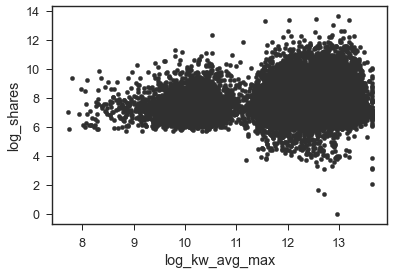

In [137]:
df.plot.scatter('log_kw_avg_max', 'log_shares')

In [138]:
f = 'log_shares~log_kw_avg_max'
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_shares   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     56.84
Date:                Wed, 06 May 2020   Prob (F-statistic):           4.84e-14
Time:                        11:53:17   Log-Likelihood:                -53367.
No. Observations:               39644   AIC:                         1.067e+05
Df Residuals:                   39642   BIC:                         1.068e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          6.9127      0.075     92.522      0.000       6.766       7.059
log_kw_avg_max     0.0458      0.006      7.539      0.000       0.034       0.058
==============================================================================
Omnibus:                     7007.242   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16323.839
Skew:                           1.010   Prob(JB):                         0.00
Kurtosis:                       5.408   Cond. No.                         198.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
df.average_token_length.unique()

array([4.6803653 , 4.91372549, 4.39336493, ..., 4.52312139, 4.4054878 ,
       4.97507331])

In [22]:
df.LDA_00.describe()

count    39644.000000
mean         0.184599
std          0.262975
min          0.000000
25%          0.025051
50%          0.033387
75%          0.240958
max          0.926994
Name: LDA_00, dtype: float64

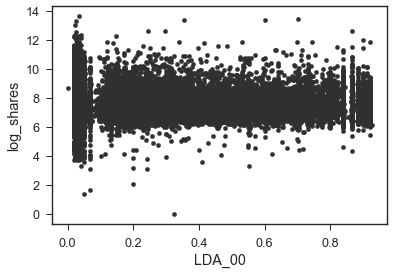

In [23]:
df.plot.scatter('LDA_00', 'log_shares')

In [25]:
df.shares.describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1265db588>]],
      dtype=object)

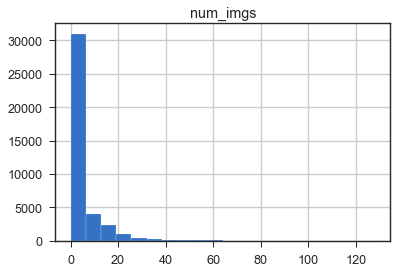

In [27]:
df.hist('num_imgs', bins=20)

In [28]:
df.num_imgs.describe()

count    39644.000000
mean         4.544143
std          8.309434
min          0.000000
25%          1.000000
50%          1.000000
75%          4.000000
max        128.000000
Name: num_imgs, dtype: float64

In [98]:
len(df[df['num_imgs'] == 0])

6987

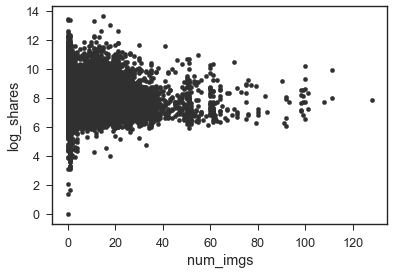

In [96]:
df.plot.scatter('num_imgs', 'log_shares')

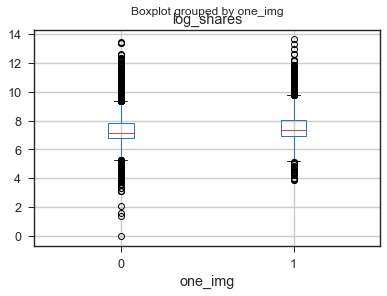

In [100]:
df['one_img'] = np.where(df.num_imgs > 1, 1, 0)
df.boxplot('log_shares', 'one_img')

In [31]:
df.num_videos.describe()

count    39644.000000
mean         1.249874
std          4.107855
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         91.000000
Name: num_videos, dtype: float64

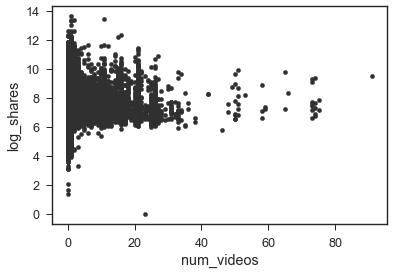

In [32]:
df.plot.scatter('num_videos', 'log_shares')

In [34]:
df.num_links.describe()

count    39644.000000
mean        10.883690
std         11.332017
min          0.000000
25%          4.000000
50%          8.000000
75%         14.000000
max        304.000000
Name: num_links, dtype: float64

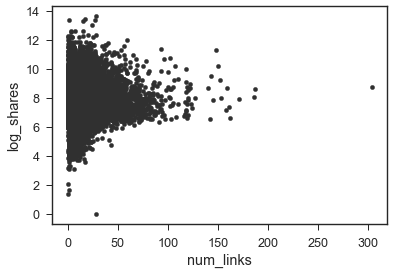

In [35]:
df.plot.scatter('num_links', 'log_shares')

In [36]:
df.num_self_links.describe()

count    39644.000000
mean         3.293638
std          3.855141
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max        116.000000
Name: num_self_links, dtype: float64

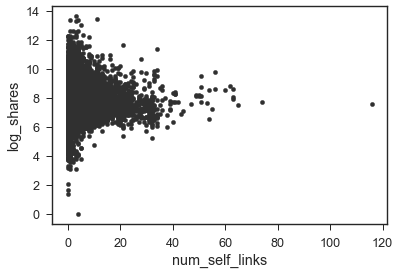

In [37]:
df.plot.scatter('num_self_links', 'log_shares')

In [38]:
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'rate_unique_tokens', 'rate_non_stop_words',
       'rate_non_stop_unique_tokens', 'num_links', 'num_self_links',
       'num_imgs', 'num_videos', 'average_token_length', 'num_keywords',
       'lifestyle', 'entertainment', 'business', 'social_media', 'tech',
       'world', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max',
       'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_ref_min_shares', 'self_ref_max_shares', 'self_ref_avg_shares',
       'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday',
       'sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polar

In [39]:
genre_cols = ['lifestyle', 'entertainment', 'business', 'social_media', 'tech', 'world']
day_cols = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']

df_genres = df[genre_cols]
df_days = df[day_cols]
df_genres_01 = df[genre_cols]
df_days_01 = df[day_cols]

In [40]:
for col in df_genres.columns:
    df_genres[col] = df_genres[col] * df['shares']

for col in df_days.columns:
    df_days[col] = df_days[col] * df['shares']

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [41]:
df_genres_01.head()

,lifestyle,entertainment,business,social_media,tech,world
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,1,0,0,0,0
4,0,0,0,0,1,0


In [42]:
df_genres.head()

,lifestyle,entertainment,business,social_media,tech,world
0,0,593,0,0,0,0
1,0,0,711,0,0,0
2,0,0,1500,0,0,0
3,0,1200,0,0,0,0
4,0,0,0,0,505,0


In [43]:
df_days.head()

,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,593,0,0,0,0,0,0
1,711,0,0,0,0,0,0
2,1500,0,0,0,0,0,0
3,1200,0,0,0,0,0,0
4,505,0,0,0,0,0,0


In [44]:
# df_genres = df_genres.reindex(df_genres.mean().sort_values().index, axis=1)
df_genres = df_genres.reindex(df_genres_01.sum().sort_values().index, axis=1)
df_genres_01 = df_genres_01.reindex(df_genres_01.sum().sort_values().index, axis=1)

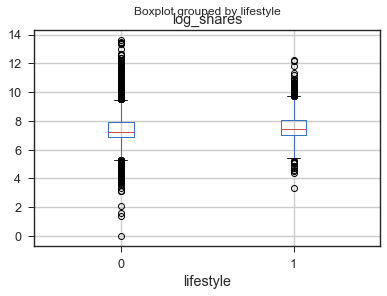

In [46]:
df.boxplot('log_shares', 'lifestyle')

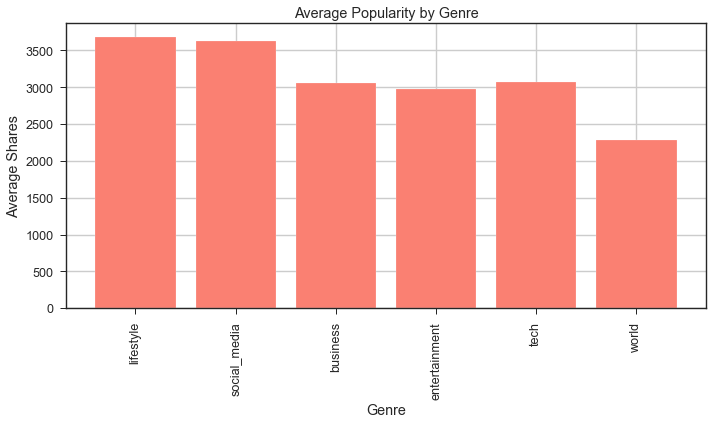

In [47]:
sns.set_style('ticks')

plt.figure(figsize=(10,6))
plt.bar(df_genres.columns, df_genres.sum()/df_genres.astype(bool).sum(axis=0), color='salmon') 
plt.xticks(rotation='vertical')

plt.title('Average Popularity by Genre')
plt.ylabel('Average Shares')
plt.xlabel('Genre')
plt.grid(True)
plt.tight_layout() 
#automatically adjusts plot so that it fits into the figure area.
plt.show() 
#display our graph

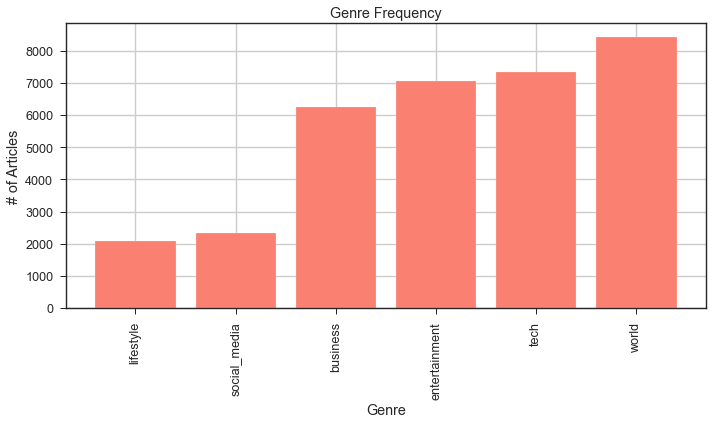

In [66]:
sns.set_style('ticks')

plt.figure(figsize=(10,6))
plt.bar(df_genres_01.columns, df_genres_01.sum(), color='salmon') 
plt.xticks(rotation='vertical')

plt.title('Genre Frequency')
plt.ylabel('# of Articles')
plt.xlabel('Genre')
plt.grid(True)
plt.tight_layout() 
#automatically adjusts plot so that it fits into the figure area.
plt.show() 
#display our graph

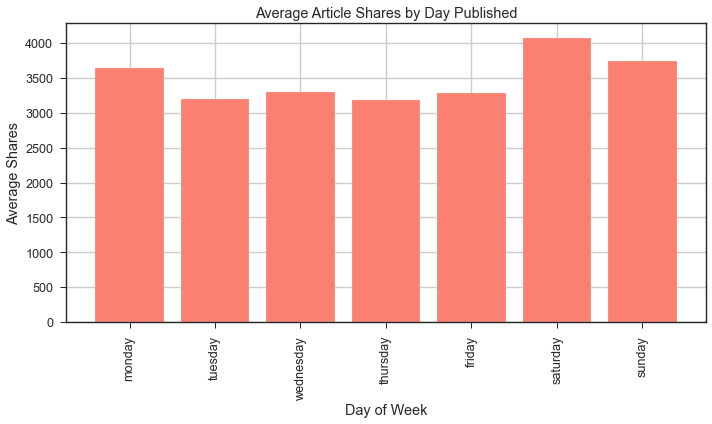

In [50]:
sns.set_style('ticks')

plt.figure(figsize=(10,6))
plt.bar(df_days.columns, df_days.sum()/df_days.astype(bool).sum(axis=0), color='salmon') 
plt.xticks(rotation='vertical')

plt.title('Average Article Shares by Day Published')
plt.ylabel('Average Shares')
plt.xlabel('Day of Week')
plt.grid(True)
plt.tight_layout() 
#automatically adjusts plot so that it fits into the figure area.
plt.show() 
#display our graph

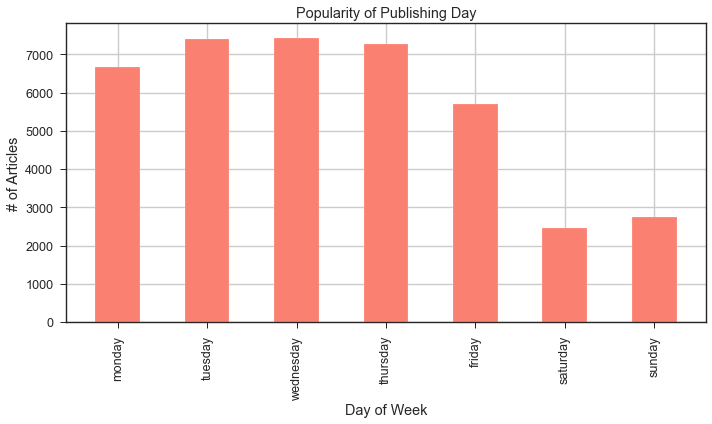

In [68]:
sns.set_style('ticks')

plt.figure(figsize=(10,6))
plt.bar(df_days_01.columns, df_days_01.sum(), color='salmon', width=0.5) 
plt.xticks(rotation='vertical')

plt.title('Popularity of Publishing Day')
plt.ylabel('# of Articles')
plt.xlabel('Day of Week')
plt.grid(True)
plt.tight_layout() 
#automatically adjusts plot so that it fits into the figure area.
plt.show() 
#display our graph

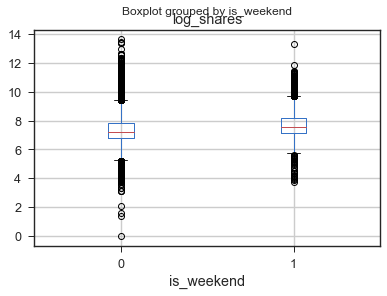

In [64]:
df.boxplot('log_shares', 'is_weekend')

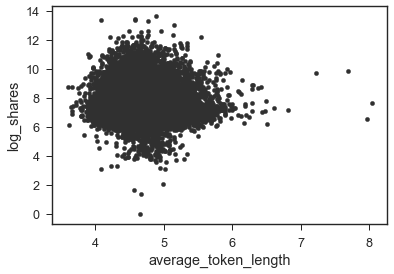

In [52]:
df['average_token_length'] = np.where(df.average_token_length == 0, df.average_token_length.mean(), df.average_token_length)
df.plot.scatter('average_token_length', 'log_shares')

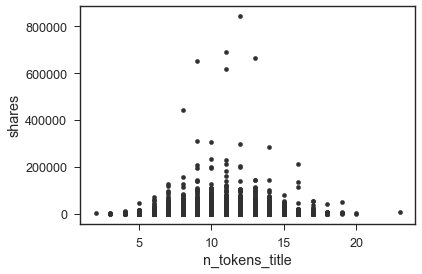

In [53]:
df.plot.scatter('n_tokens_title', 'shares')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12b220a58>]],
      dtype=object)

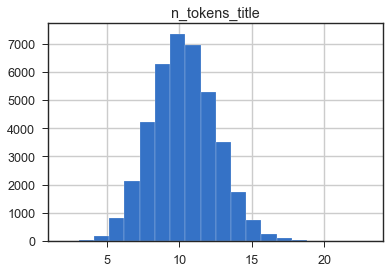

In [54]:
df.hist('n_tokens_title', bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12b285a58>]],
      dtype=object)

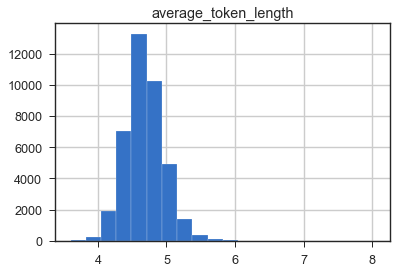

In [55]:
df.hist('average_token_length', bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12c271358>]],
      dtype=object)

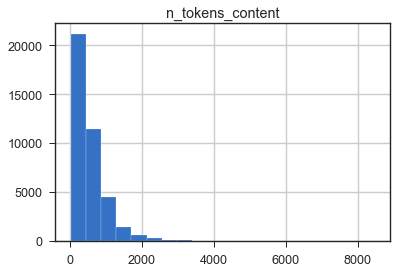

In [56]:
df.hist('n_tokens_content', bins=20)

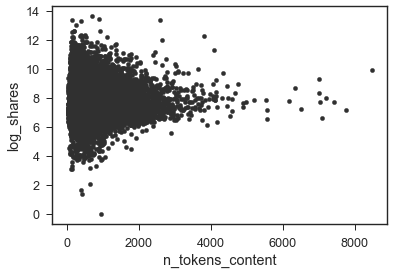

In [57]:
df.plot.scatter('n_tokens_content', 'log_shares')

In [58]:
df.n_tokens_content.describe()

count    39644.000000
mean       558.698895
std        462.016546
min         18.000000
25%        264.000000
50%        409.000000
75%        716.000000
max       8474.000000
Name: n_tokens_content, dtype: float64

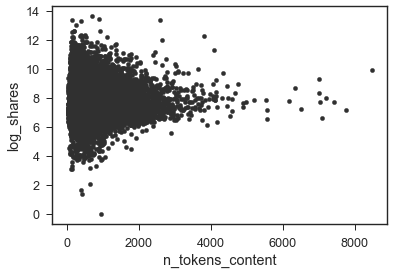

In [59]:
df['n_tokens_content'] = np.where(df.n_tokens_content == 0, df.n_tokens_content.median(), df.n_tokens_content)
df.plot.scatter('n_tokens_content', 'log_shares')

In [69]:
df.rate_unique_tokens.describe()

count    39644.000000
mean         0.546622
std          0.100812
min          0.114964
25%          0.479532
50%          0.539230
75%          0.608696
max          1.000000
Name: rate_unique_tokens, dtype: float64

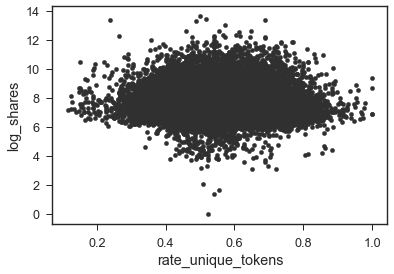

In [72]:

df.plot.scatter('rate_unique_tokens', 'log_shares')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12bbe95f8>]],
      dtype=object)

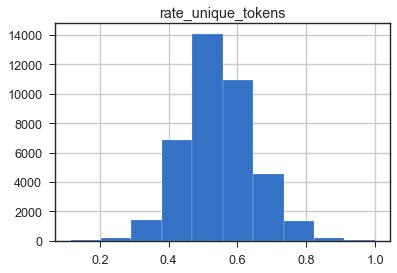

In [74]:
df.hist('rate_unique_tokens')

In [75]:
df['rate_unique_tokens'].corr(df['shares'])

0.008292272416857318

In [76]:
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'rate_unique_tokens', 'rate_non_stop_words',
       'rate_non_stop_unique_tokens', 'num_links', 'num_self_links',
       'num_imgs', 'num_videos', 'average_token_length', 'num_keywords',
       'lifestyle', 'entertainment', 'business', 'social_media', 'tech',
       'world', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max',
       'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_ref_min_shares', 'self_ref_max_shares', 'self_ref_avg_shares',
       'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday',
       'sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polar

In [79]:
df['avg_positive_polarity'].corr(df['avg_negative_polarity'])

nan

In [80]:
df_features = df.drop(columns=['shares', 'log_shares', 'n_unique_tokens', 'n_non_stop_words',
                               'social_media','kw_max_max', 'self_ref_min_shares', 'self_ref_max_shares',
                               'sunday', 'saturday', 'LDA_00', 'avg_positive_polarity', 'sqrt_links',
                               'n_non_stop_unique_tokens', 'tech', 'max_positive_polarity', 'min_negative_polarity',
                               'abs_title_sentiment_polarity', 'num_videos', 'max_negative_polarity', 'rate_negative_words',
                              'text_sentiment_polarity', 'rate_positive_words', 'avg_negative_polarity', 'has_img'])

KeyError: "['n_unique_tokens' 'n_non_stop_words' 'sqrt_links'\n 'n_non_stop_unique_tokens' 'text_sentiment_polarity'] not found in axis"

In [81]:
df_features = df[['n_tokens_title', 'n_tokens_content',
'lifestyle', 'entertainment',
       'business', 'tech', 'world', 'is_weekend',
       'text_subjectivity',
       'text_sentiment_polarity', 'rate_positive_words', 'rate_negative_words',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity',
       'has_img', 'has_video']]

KeyError: "['text_sentiment_polarity', 'text_subjectivity'] not in index"

In [ ]:
col_list = '+'.join(df_features.columns)
f = 'log_shares~' + col_list
model = ols(formula=f, data=df).fit()
model.summary()

In [ ]:
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(22, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [88]:
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'rate_unique_tokens', 'rate_non_stop_words',
       'rate_non_stop_unique_tokens', 'num_links', 'num_self_links',
       'num_imgs', 'num_videos', 'average_token_length', 'num_keywords',
       'lifestyle', 'entertainment', 'business', 'social_media', 'tech',
       'world', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max',
       'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_ref_min_shares', 'self_ref_max_shares', 'self_ref_avg_shares',
       'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday',
       'sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polar

In [ ]:
import plotly.figure_factory as ff
figure = ff.create_scatterplotmatrix(
    df[['claps', 'publication', 'views',      
        'read_ratio','word_count']],
    diag='histogram',
    index='publication')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import KFold
regression = LinearRegression(normalize=True)
crossvalidation = KFold(n=X.shape[0], n_folds=10, shuffle=True, random_state=1)

In [ ]:
df_test = pd.DataFrame(X,columns=boston.feature_names)
baseline = np.mean(cross_val_score(regression, df, y, scoring=‘r2’, cv=crossvalidation, n_jobs=1))
interactions = list()
for feature_A in boston.feature_names:
    for feature_B in boston.feature_names:
        if feature_A > feature_B:
            df['interaction'] = df[feature_A] * df[feature_B]
            score = np.mean(cross_val_score(regression, df, y, scoring=‘r2’,
                            cv=crossvalidation, n_jobs=1))
            if score > baseline:
                interactions.append((feature_A, feature_B, round(score,3)))
print ‘Baseline R2: %.3f’ % baseline
print ‘Top 10 interactions: %s’ % sorted(interactions, key=lambda(x):x[2],
 reverse=True)[:10]
Baseline R2: 0.699
Top 10 interactions: [(‘RM’, ‘LSTAT’, 0.782), (‘TAX’, ‘RM’, 0.766),
 (‘RM’, ‘RAD’, 0.759), (‘RM’, ‘PTRATIO’, 0.75), 
(‘RM’, ‘INDUS’, 0.748), (‘RM’, ‘NOX’, 0.733), 
(‘RM’, ‘B’, 0.731), (‘RM’, ‘AGE’, 0.727), 
(‘RM’, ‘DIS’, 0.722), (‘ZN’, ‘RM’, 0.716)]

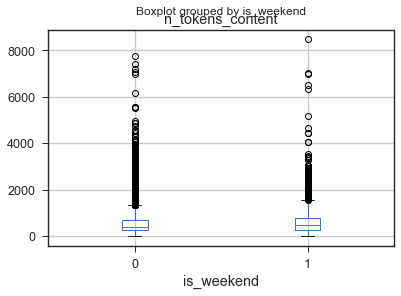

In [92]:
df.boxplot('n_tokens_content', 'is_weekend')

In [ ]:
regression_1 = LinearRegression()
regression_2 = LinearRegression()
regression_3 = LinearRegression()

horse_1 = origin_1['horse'].values.reshape(-1, 1)
horse_2 = origin_2['horse'].values.reshape(-1, 1)
horse_3 = origin_3['horse'].values.reshape(-1, 1)

regression_1.fit(horse_1, origin_1['mpg'])
regression_2.fit(horse_2, origin_2['mpg'])
regression_3.fit(horse_3, origin_3['mpg'])

# Make predictions using the testing set
pred_1 = regression_1.predict(horse_1)
pred_2 = regression_2.predict(horse_2)
pred_3 = regression_3.predict(horse_3)

# The coefficients
print(regression_1.coef_)
print(regression_2.coef_)
print(regression_3.coef_)

In [ ]:
# Plot outputs
plt.figure(figsize=(10,6))

plt.scatter(df['', origin_1['mpg'],  color='blue', alpha=0.3, label = 'origin = 1')
plt.scatter(horse_2, origin_2['mpg'],  color='red', alpha=0.3, label = 'origin = 2')
plt.scatter(horse_3, origin_3['mpg'],  color='orange', alpha=0.3, label = 'origin = 3')

plt.plot(horse_1, pred_1, color='blue', linewidth=2)
plt.plot(horse_2, pred_2, color='red', linewidth=2)
plt.plot(horse_3, pred_3, color='orange', linewidth=2)
plt.ylabel('mpg')
plt.xlabel('horsepower')
plt.legend();

In [94]:
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'rate_unique_tokens', 'rate_non_stop_words',
       'rate_non_stop_unique_tokens', 'num_links', 'num_self_links',
       'num_imgs', 'num_videos', 'average_token_length', 'num_keywords',
       'lifestyle', 'entertainment', 'business', 'social_media', 'tech',
       'world', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max',
       'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_ref_min_shares', 'self_ref_max_shares', 'self_ref_avg_shares',
       'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday',
       'sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polar

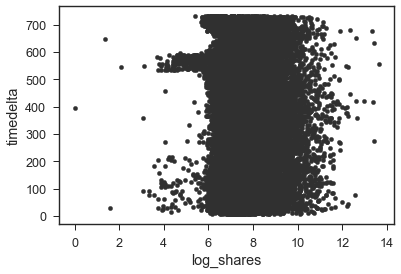

In [95]:
df.plot.scatter('log_shares', 'timedelta')

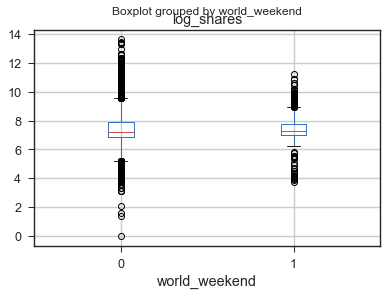

In [101]:
df['world_weekend'] = df['world'] * df['is_weekend']
df.boxplot('log_shares', 'world_weekend')

In [102]:
df['world_weekend'].sum()

1086

In [140]:
features.columns

Index(['n_tokens_title', 'n_tokens_content', 'rate_unique_tokens',
       'rate_non_stop_unique_tokens', 'num_links', 'num_self_links',
       'average_token_length', 'num_keywords', 'entertainment', 'business',
       'social_media', 'tech', 'world', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_ref_avg_shares', 'tuesday', 'wednesday', 'thursday', 'friday',
       'saturday', 'sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02',
       'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'l

In [145]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
regression = LinearRegression()

In [146]:
continuous = ['n_tokens_title', 'n_tokens_content', 'rate_unique_tokens',
               'rate_non_stop_unique_tokens', 'num_links', 'num_self_links',
               'average_token_length', 'num_keywords', 'kw_max_min', 'kw_avg_min',
               'kw_min_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
               'self_ref_avg_shares',  'LDA_00', 'LDA_01', 'LDA_02',
               'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
               'global_rate_positive_words', 'global_rate_negative_words',
               'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
               'min_positive_polarity', 'max_positive_polarity',
               'avg_negative_polarity', 'min_negative_polarity',
               'max_negative_polarity', 'title_subjectivity',
               'title_sentiment_polarity', 'abs_title_subjectivity',
               'abs_title_sentiment_polarity']
categoricals = ['entertainment', 'business', 'social_media', 'tech', 'world', 'tuesday', 'wednesday', 'thursday',
                'friday', 'saturday', 'sunday', 'is_weekend', 'has_img', 'has_video']

target = features['log_shares']

features_cont = features[continuous]

# log features
log_names = [f'{column}_log' for column in features_cont.columns]

features_log = np.log(features_cont)
features_log.columns = log_names

# normalize (subract mean and divide by std)

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

features_log_norm = features_log.apply(normalize)

features_cat = features[categoricals]

preprocessed = pd.concat([target, features_cont, features_cat], axis=1)

X = preprocessed.drop('log_shares', axis=1)
y = preprocessed['log_shares']

crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression, X, y, scoring='r2', cv=crossvalidation))

baseline

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in log


0.12221915211833342

In [147]:
from itertools import combinations

interactions = []

feat_combinations = combinations(X.columns, 2)

data = X.copy()
for i, (a, b) in enumerate(feat_combinations):
    data['interaction'] = data[a] * data[b]
    score = np.mean(cross_val_score(regression, data, y, scoring='r2', cv=crossvalidation))
    if score > baseline:
        interactions.append((a, b, round(score,3)))
    
    if i % 50 == 0:
        print(i)
            
print('Top 3 interactions: %s' %sorted(interactions, key=lambda inter: inter[2], reverse=True)[:3])

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
Top 3 interactions: [('average_token_length', 'world', 0.124), ('kw_avg_avg', 'has_img', 0.124), ('LDA_00', 'social_media', 0.124)]


In [189]:
len(interactions)

551

In [185]:
top_100 = sorted(interactions, key=lambda inter: inter[2], reverse=True)[:100]
top_100[-10:]

[('global_sentiment_polarity', 'tech', 0.123),
 ('global_sentiment_polarity', 'world', 0.123),
 ('global_rate_positive_words', 'abs_title_subjectivity', 0.123),
 ('global_rate_positive_words', 'world', 0.123),
 ('global_rate_positive_words', 'has_img', 0.123),
 ('global_rate_negative_words', 'abs_title_subjectivity', 0.123),
 ('rate_positive_words', 'abs_title_subjectivity', 0.123),
 ('rate_positive_words', 'tech', 0.123),
 ('rate_positive_words', 'world', 0.123),
 ('rate_negative_words', 'abs_title_subjectivity', 0.123)]

In [195]:
top_120 = sorted(interactions, key=lambda inter: inter[2], reverse=True)[:120]
top_120[-10:]

[('entertainment', 'sunday', 0.123),
 ('entertainment', 'is_weekend', 0.123),
 ('business', 'has_video', 0.123),
 ('social_media', 'has_video', 0.123),
 ('world', 'has_img', 0.123),
 ('n_tokens_title', 'rate_non_stop_unique_tokens', 0.122),
 ('n_tokens_title', 'kw_min_max', 0.122),
 ('n_tokens_title', 'LDA_00', 0.122),
 ('n_tokens_title', 'LDA_02', 0.122),
 ('n_tokens_title', 'LDA_04', 0.122)]

In [200]:
regression = LinearRegression()
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
final = X.copy()

for i in top_100:
    final[i[0]+'_'+i[1]] = final[i[0]] * final[i[1]]

final_model = np.mean(cross_val_score(regression, final, y, scoring='r2', cv=crossvalidation))

final_model

0.14130672111815018

In [201]:
final_target = pd.concat([target, final], axis=1)

In [202]:
f_list = list(final_target.columns)
f_list.remove('log_shares')

col_list = '+'.join(f_list)
f = 'log_shares~' + col_list
model = ols(formula=f, data=final_target).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_shares   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     48.32
Date:                Wed, 06 May 2020   Prob (F-statistic):               0.00
Time:                        13:34:18   Log-Likelihood:                -50138.
No. Observations:               39644   AIC:                         1.006e+05
Df Residuals:                   39497   BIC:                         1.018e+05
Df Model:                         146                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             5.8720     11.504      0.510      0.610     -16.675      28.419
n_tokens_title                                       -0.0101      0.019     -0.519      0.604      -0.048       0.028
n_tokens_content                                      0.0003      0.000      2.894      0.004       0.000       0.001
rate_unique_tokens                                    0.9526      0.504      1.892      0.059      -0.035       1.940
rate_non_stop_unique_tokens                          -0.1848      0.268     -0.689      0.491      -0.711       0.341
num_links                                             0.0070      0.002      2.896      0.004       0.002       0.012
num_self_links                                       -0.1006      0.027     -3.740      0.000      -0.153      -0.048
average_token_length                                 -0.1611      0.100     -1.605      0.109      -0.358       0.036
num_keywords                                         -0.6800      1.495     -0.455      0.649      -3.611       2.251
kw_max_min                                        -1.333e-05   7.37e-06     -1.807      0.071   -2.78e-05    1.13e-06
kw_avg_min                                            0.0001   4.63e-05      2.343      0.019    1.77e-05       0.000
kw_min_max                                        -1.636e-06   4.88e-07     -3.351      0.001   -2.59e-06   -6.79e-07
kw_avg_max                                        -1.538e-06   2.16e-07     -7.125      0.000   -1.96e-06   -1.11e-06
kw_min_avg                                        -4.963e-05   1.22e-05     -4.073      0.000   -7.35e-05   -2.57e-05
kw_max_avg                                        -6.099e-05   6.71e-06     -9.083      0.000   -7.41e-05   -4.78e-05
kw_avg_avg                                            0.0003   2.57e-05     10.410      0.000       0.000       0.000
self_ref_avg_shares                                2.778e-06   6.26e-07      4.436      0.000    1.55e-06       4e-06
LDA_00                                               -2.0740      0.981     -2.114      0.035      -3.997      -0.151
LDA_01                                               -3.1987      0.919     -3.480      0.001      -5.000      -1.397
LDA_02                                               -5.3165      9.943     -0.535      0.593     -24.806      14.173
LDA_03                                               -3.1717      0.945     -3.357      0.001      -5.023      -1.320
LDA_04                                               -2.6523      0.897     -2.958      0.003      -4.410      -0.895
global_subjectivity                                   0.2492      0.870      0.287      0.774      -1.455       1.954
global_sentimen

In [199]:
f_list2 = list(final_target.columns)
f_list2.remove('log_shares')
f_list2.remove('n_tokens_title')
f_list2.remove('num_keywords')
f_list2.remove('LDA_02')
f_list2.remove('global_subjectivity')
f_list2.remove('global_sentiment_polarity')
f_list2.remove('rate_positive_words')

f_list2.remove('rate_negative_words')
f_list2.remove('max_positive_polarity')
f_list2.remove('avg_negative_polarity')
f_list2.remove('min_negative_polarity')
f_list2.remove('max_negative_polarity')
f_list2.remove('abs_title_subjectivity')

f_list2.remove('avg_positive_polarity_social_media')
f_list2.remove('n_tokens_title_rate_unique_tokens')
f_list2.remove('n_tokens_content_LDA_02')
f_list2.remove('n_tokens_content_LDA_04')
f_list2.remove('rate_non_stop_unique_tokens_LDA_00')
f_list2.remove('rate_non_stop_unique_tokens_has_img')

f_list2.remove('average_token_length_global_subjectivity')
f_list2.remove('num_keywords_rate_positive_words')
f_list2.remove('num_keywords_rate_negative_words')
f_list2.remove('kw_min_avg_has_img')
f_list2.remove('kw_avg_avg_has_video')
f_list2.remove('LDA_00_min_negative_polarity')


col_list = '+'.join(f_list2)
f = 'log_shares~' + col_list
model = ols(formula=f, data=final_target).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_shares   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     48.66
Date:                Wed, 06 May 2020   Prob (F-statistic):               0.00
Time:                        13:33:49   Log-Likelihood:                -50117.
No. Observations:               39644   AIC:                         1.005e+05
Df Residuals:                   39497   BIC:                         1.018e+05
Df Model:                         146                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                            10.9499      0.968     11.306      0.000       9.052      12.848
n_tokens_content                                      0.0002   8.69e-05      2.688      0.007    6.33e-05       0.000
rate_unique_tokens                                    0.8454      0.269      3.145      0.002       0.319       1.372
rate_non_stop_unique_tokens                          -0.5703      0.241     -2.363      0.018      -1.043      -0.097
num_links                                             0.0083      0.002      3.442      0.001       0.004       0.013
num_self_links                                       -0.1049      0.027     -3.899      0.000      -0.158      -0.052
average_token_length                                 -0.1894      0.076     -2.481      0.013      -0.339      -0.040
kw_max_min                                        -9.561e-06   6.95e-06     -1.375      0.169   -2.32e-05    4.07e-06
kw_avg_min                                         8.292e-05   4.27e-05      1.944      0.052   -6.78e-07       0.000
kw_min_max                                        -1.631e-06   6.06e-07     -2.689      0.007   -2.82e-06   -4.42e-07
kw_avg_max                                        -1.594e-06   2.19e-07     -7.285      0.000   -2.02e-06   -1.17e-06
kw_min_avg                                        -5.004e-05    6.8e-06     -7.357      0.000   -6.34e-05   -3.67e-05
kw_max_avg                                        -6.262e-05   6.31e-06     -9.930      0.000    -7.5e-05   -5.03e-05
kw_avg_avg                                            0.0003   2.16e-05     12.195      0.000       0.000       0.000
self_ref_avg_shares                                2.788e-06   6.24e-07      4.466      0.000    1.56e-06    4.01e-06
LDA_00                                               -1.9396      0.978     -1.982      0.047      -3.857      -0.022
LDA_01                                               -3.3037      0.911     -3.627      0.000      -5.089      -1.519
LDA_03                                               -3.3077      0.935     -3.538      0.000      -5.140      -1.475
LDA_04                                               -2.6489      0.893     -2.965      0.003      -4.400      -0.898
global_rate_positive_words                           -5.1297      0.891     -5.755      0.000      -6.877      -3.383
global_rate_negative_words                           -5.4678      1.948     -2.806      0.005      -9.287      -1.649
avg_positive_polarity                                -1.4282      0.814     -1.755      0.079      -3.023       0.167
min_positive_polarity                                -0.1542      0.125     -1.236      0.216      -0.399       0.090
title_subjectiv